In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

d = pd.read_csv('C:/Users/tanak/OneDrive/ドキュメント/pokemon_for_stats.csv').iloc[:,1:]
d

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
0,1,フシギダネ,くさ,どく,6.9,0.7,45,49,49,65,65,45,318
1,2,フシギソウ,くさ,どく,13.0,1.0,60,62,63,80,80,60,405
2,3,フシギバナ,くさ,どく,100.0,2.0,80,82,83,100,100,80,525
3,4,ヒトカゲ,ほのお,NaN,8.5,0.6,39,52,43,60,50,65,309
4,5,リザード,ほのお,NaN,19.0,1.1,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,レジエレキ,でんき,NaN,145.0,1.2,80,100,50,100,50,200,580
894,895,レジドラゴ,ドラゴン,NaN,200.0,2.1,200,100,50,100,50,80,580
895,896,ブリザポス,こおり,NaN,800.0,2.2,100,145,130,65,110,30,580
896,897,レイスポス,ゴースト,NaN,44.5,2.0,100,65,60,145,80,130,580


#### 度数分布とヒストグラム
度数分布表は、観測値の取り得る値をいくつかの階級に分け、それぞれの階級で観測値がいくつあるか度数を数えて表にしたものである。
階級値とは階級の代表する値のことであって、各階級の中で観測値は一様に分布していると仮定して、階級の上限値と下限値の中間値を階級値とするのが普通である。  
相対度数は観測値の総数、すなわちデータ全体の大きさを1としたときの、各階級に属する観測値の個数の全体中での割合を示す。

累積度数、累積相対度数とは、度数を下の階級から順に積み上げたときの度数、相対度数の累積和である。

度数分布表からは、一般にヒストグラムまたは柱状グラフと呼ばれるグラフが描かれる。
それぞれの階級に対して階級幅を横幅とし柱の面積が度数と比例するように高さを定める。

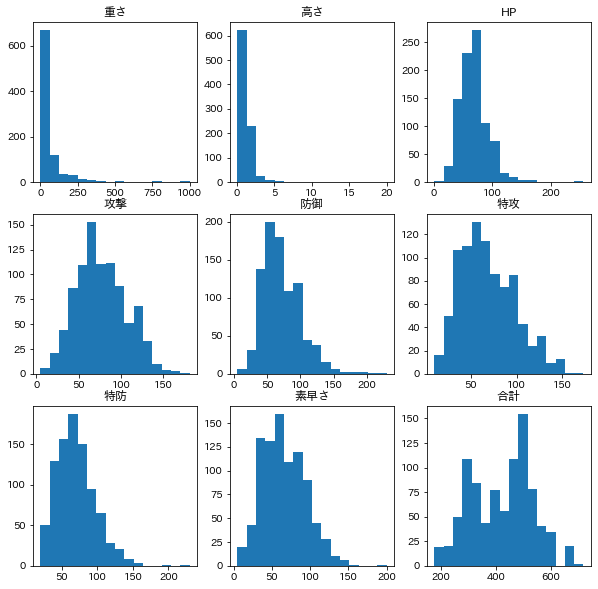

In [2]:
num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']

fig, axes = plt.subplots(3, 3, figsize=(10,10))

for i, c in enumerate(num_cols):
    axes[i//3][i%3].hist(d[c], bins=16);
    axes[i//3][i%3].set_title(c)

In [3]:
freq = d['攻撃'].value_counts(bins=16,sort=False)
hist_range = freq.index
hist_count = freq.values

df = pd.DataFrame({'階級':hist_range, '度数':hist_count.astype(int)})
df['相対度数'] = df['度数'] / sum(df['度数'])
df['累積度数'] = df['度数'].cumsum()
df['累積相対度数'] = df['相対度数'].cumsum()
df

,階級,度数,相対度数,累積度数,累積相対度数
0,"(4.8229999999999995, 16.0]",6,0.006682,6,0.006682
1,"(16.0, 27.0]",22,0.024499,28,0.031180
2,"(27.0, 38.0]",47,0.052339,75,0.083519
3,"(38.0, 49.0]",85,0.094655,160,0.178174
4,"(49.0, 60.0]",147,0.163697,307,0.341871
5,"(60.0, 71.0]",114,0.126949,421,0.468820
6,"(71.0, 82.0]",116,0.129176,537,0.597996
7,"(82.0, 93.0]",105,0.116927,642,0.714922
8,"(93.0, 104.0]",88,0.097996,730,0.812918
9,"(104.0, 115.0]",64,0.071269,794,0.884187


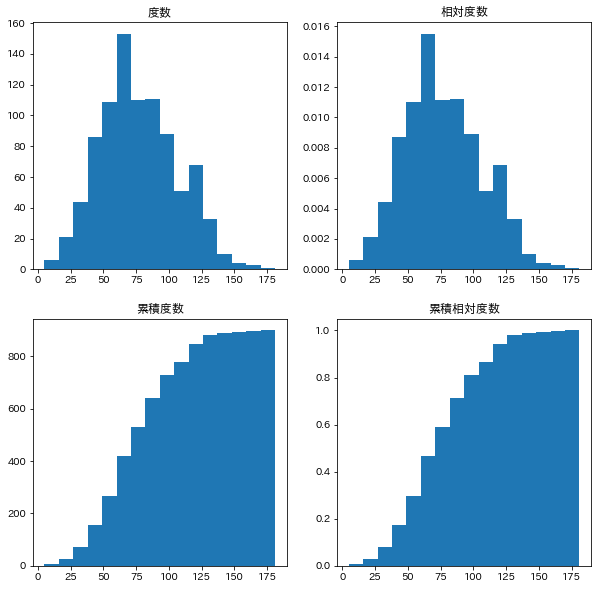

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0][0].hist(d['攻撃'], bins=16);
axes[0][0].set_title('度数');

axes[0][1].hist(d['攻撃'], bins=16, density=True);
axes[0][1].set_title('相対度数');

axes[1][0].hist(d['攻撃'], bins=16, cumulative=True);
axes[1][0].set_title('累積度数');

axes[1][1].hist(d['攻撃'], bins=16, cumulative=True, density=True);
axes[1][1].set_title('累積相対度数');

「攻撃」の分布は中央に一つの峰がある山型分布である。
しかし、左右対称の山型分布にならないものも多くある。
例えば、下の図の「高さ」の分布のように右側に長く裾を引く分布のことを右に歪んだ分布という。
「合計」の分布のようにデータによっては峰が二つ以上ある分布(双方型)も生じることがある。
そのような場合、性質の異なるデータがまじりあっていることが多く、適当にグループ分けすると峰が一つの単純な分布(単峰型)が現れることが多い。
このような操作を層別という。

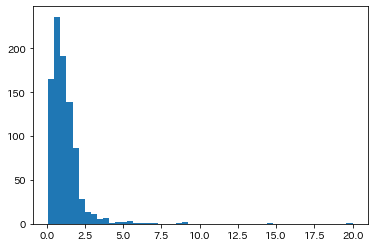

In [5]:
plt.hist(d['高さ'], bins=50);

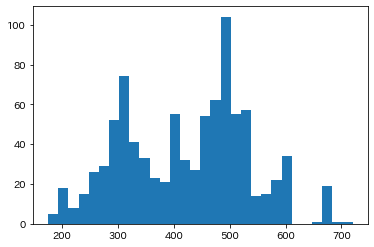

In [6]:
plt.hist(d['合計'], bins=30);

階級数については、階級数が少ないと荒すぎるためありふれた形となり真の分布を見出しえない。
一方、階級数が多すぎると階級によって小さなデコボコが生じて、真の分布が偶然性によって乱される場合が多い。
階級数の統一的なルールはないが、スタージェスの公式が参考になる。
$$
k\fallingdotseq 1+\log_2n=1+(\log_{10}n)/(\log_{10}2)
$$

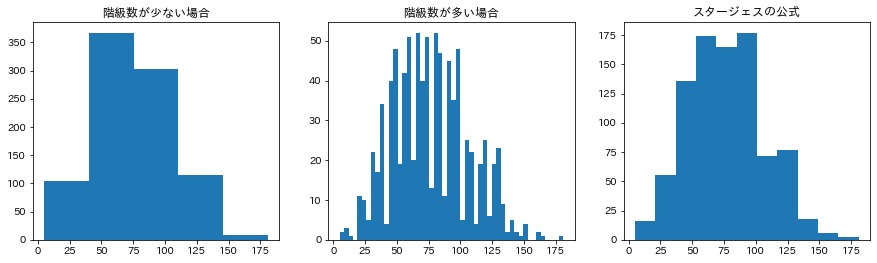

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(d['攻撃'], bins=5);
axes[0].set_title('階級数が少ない場合')
axes[1].hist(d['攻撃'], bins=50);
axes[1].set_title('階級数が多い場合')
axes[2].hist(d['攻撃'], bins=int(np.ceil(1+np.log2(len(d)))));
axes[2].set_title('スタージェスの公式');

累積度数を組み合わせて書いた折れ線をローレンツ曲線と呼ぶ。  
ローレンツ曲線は分配の不平等さを示すのに用いられる。
対角線からの分離の度合が大きいほど、不平等に分布している。

少し無理があるが、「攻撃」の累積相対度数と「合計」および「重さ」の累積相対度数を組み合わせたローレンツ曲線を示す。
「攻撃」と「合計」については平等に振り分けられているが、「攻撃」と「重さ」については直線からの分離が大きい。
「重さ」が大きいポケモンに大きな「攻撃」をもったものが含まれている可能性がある。

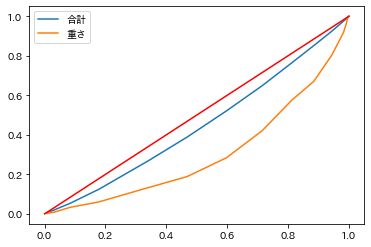

In [8]:
d['攻撃_bin'] = pd.cut(d['攻撃'], bins=hist_range)
d_agg = d.groupby(['攻撃_bin']).agg({'ポケモン':'count', '合計':'sum', '重さ':'sum'}).reset_index()
d_agg['ポケモン'] = d_agg['ポケモン'].cumsum() / d_agg['ポケモン'].sum() 
d_agg['合計'] = d_agg['合計'].cumsum() / d_agg['合計'].sum() 
d_agg['重さ'] = d_agg['重さ'].cumsum() / d_agg['重さ'].sum() 

plt.plot(d_agg.ポケモン, d_agg.合計, label='合計')
plt.plot(d_agg.ポケモン, d_agg.重さ, label='重さ')
plt.plot([0,1], [0,1], 'red')
plt.legend();

#### 代表値
代表値とは、分布を代表する値のことである。
最もよく知られている代表値は平均であり、その中でも特に算術平均と呼ばれる値である。  
算術平均は観測値$x_1,x_2,\cdots,x_n$の和を観測値の総数、すなわちデータの大きさ$n$で割ったものであり、
$$
\bar{x}=\frac{x_1+\cdots+x_n}{n}
$$
と定義される。
離散型データの場合、各観測値に対してその値をとる度数を掛けて、その合計をデータの大きさで割ればよい。  
観測値の取り得る値を$v_1,\cdots,v_k$とし、それぞれの度数が$f_1,\cdots,f_k$であるとすると、平均は
$$
\bar{x}=\frac{f_1v_1+\cdots+f_kv_k}{f_1+\cdots+f_k}
$$
によって求めることができる。
度数分布表から計算された平均値は階級値が使用されるため真の平均値とは一致しないことに注意する。

平均には、幾何平均$x_G$
$$
x_G=\sqrt[n]{x_1・x_2・\cdots・x_n}
$$
調和平均$x_H$
$$
\frac{1}{x_H}=\frac{1}{n}\biggl(\frac{1}{x_1}+\cdots+\frac{1}{x_n} \biggr)
$$

などがある。

In [9]:
d[num_cols].mean()

重さ      63.970045
高さ       1.185969
HP      69.031180
攻撃      76.544543
防御      71.897550
特攻      69.681514
特防      69.887528
素早さ     65.949889
合計     422.992205
dtype: float64

メディアン(中位数、中央値)は、観測値を小さいものから順番に並び替えたときの中央の値である。
データ$x_1,\cdots,x_n$を大きさの順序に並び替えたものを、小さいものから$x_{(1)},\cdots,x_{(n)}$とかく。
メディアンは、データの大きさが奇数$n=2m+1$のときには$m+1$番目の観測値$x_{m+1}$であるが、
偶数$n=2m$の場合は、$m$番目と$m+1$番目の観測値$x_{m}$と$x_{m+1}$の平均$(x_{m}+x_{m+1})/2$をメディアンとする。

In [10]:
d[num_cols].median()

重さ      27.0
高さ       1.0
HP      65.0
攻撃      75.0
防御      67.0
特攻      65.0
特防      65.0
素早さ     65.0
合計     440.0
dtype: float64

メディアンを拡張したものに分位点がある。
観測値を小さいものの順に並び替えたとき、小さい方から$100p$%($0\leq p \leq 1$)の所にある値を100pパーセンタイル((百)分位点)という。  
よく用いられる分位点には四分位点がある。これはデータを4分割したときの3つの分割点であり、第1四分位点$Q_1$は25%分位点、第2四分位点$Q_2$は50%分位点(メディアン)、第3四分位点$Q_3$は75%分位点である。

In [11]:
d[num_cols].quantile(q=[0.25,0.5,0.75])

,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
0.25,8.5,0.5,50.0,55.0,50.0,46.25,50.0,45.0,320.0
0.50,27.0,1.0,65.0,75.0,67.0,65.00,65.0,65.0,440.0
0.75,65.0,1.5,80.0,95.0,90.0,90.00,85.0,85.0,500.0


In [12]:
np.quantile(d[num_cols], q=[0.25,0.5,0.75], axis=0)

array([[  8.5 ,   0.5 ,  50.  ,  55.  ,  50.  ,  46.25,  50.  ,  45.  ,
        320.  ],
       [ 27.  ,   1.  ,  65.  ,  75.  ,  67.  ,  65.  ,  65.  ,  65.  ,
        440.  ],
       [ 65.  ,   1.5 ,  80.  ,  95.  ,  90.  ,  90.  ,  85.  ,  85.  ,
        500.  ]])

In [13]:
d[num_cols].describe()

,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,63.970045,1.185969,69.031180,76.544543,71.897550,69.681514,69.887528,65.949889,422.992205
std,119.430298,1.234222,26.213707,29.665559,29.563766,29.372609,27.043127,28.456596,111.846123
min,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,8.500000,0.500000,50.000000,55.000000,50.000000,46.250000,50.000000,45.000000,320.000000
50%,27.000000,1.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,440.000000
75%,65.000000,1.500000,80.000000,95.000000,90.000000,90.000000,85.000000,85.000000,500.000000
max,999.900000,20.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


モード(最頻値)とは、分布の峰に対応する値のことである。度数分布表においては、その頻度が最大である階級の階級値がモードとなる。
階級の取り方によって異なることや、峰が2つ以上ある場合には有効な代表値とはならないことに注意する。

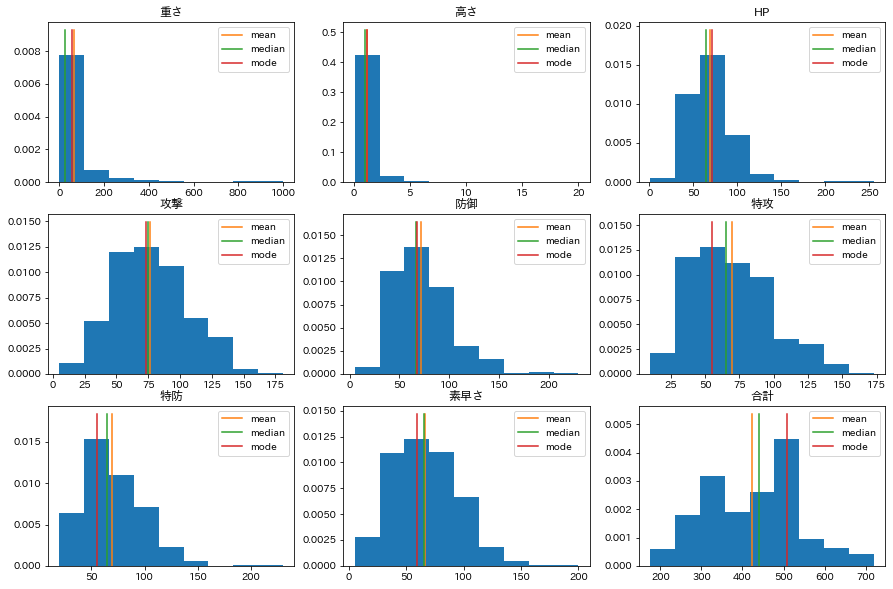

In [14]:
num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']

fig, axes = plt.subplots(3, 3, figsize=(15,10))

for i, c in enumerate(num_cols):
    mean = d[c].mean()
    med = d[c].median()
    
    a,b,_=axes[i//3][i%3].hist(d[c], bins=9, density=True);
    
    max_count =  np.max(a)*1.2
    mode = (b[np.argmax(a)]+b[np.argmax(a)+1])/2
    
    axes[i//3][i%3].plot([mean,mean], [0, max_count], label='mean');
    axes[i//3][i%3].plot([med,med], [0, max_count], label='median');
    axes[i//3][i%3].plot([mode,mode], [0, max_count], label='mode');
    
    axes[i//3][i%3].set_title(c)
    axes[i//3][i%3].legend()

平均、メディアン、モードの3つの関係を確認する。
「攻撃」のように左右対称の場合この三つの値は完全に一致する。
「特攻」や「特防」のように峰が左側によっている場合、一般的に
$$
Mean>Median>Mode
$$
である(辞書に登場する順番と覚えればよい)。

#### 散らばりの尺度
分布の形状を示す指標でよく用いられるものは散らばりの尺度と呼ばれるものである。

もっとも単純な散らばりの指標はレンジ(範囲)と呼ばれるものであって、
$$
R=\max (x_1,\cdots, x_n) - \min (x_1, \cdots, x_n)
$$


In [15]:
d[num_cols].max() - d[num_cols].min()

重さ     999.8
高さ      19.9
HP     254.0
攻撃     176.0
防御     225.0
特攻     163.0
特防     210.0
素早さ    195.0
合計     545.0
dtype: float64

重さが広く分布しており、「特防」や「防御」は同じような値をとっている。
レンジは尺度としてかなり荒いものであり、「特防」や「防御」の分布の違いを記述することはできない。
レンジを改良したものとして次の式で定義される四分位偏差がある。
$$
Q=\frac{1}{2}(Q_3-Q_1)
$$


In [16]:
dq = d[num_cols].quantile(q=[0.25,0.75]).T
dq[0.75]-dq[0.25]

重さ      56.50
高さ       1.00
HP      30.00
攻撃      40.00
防御      40.00
特攻      43.75
特防      35.00
素早さ     40.00
合計     180.00
dtype: float64

各観測値が平均からどれだけ離れているかについての平均を求めたものが平均偏差である。
$$
d=\frac{1}{n}\{|x_1-\bar{x}|+|x_2-\bar{x}|+\cdots+|x_n-\bar{x}| \}
$$
平均からの偏差は正負両符号を含むため絶対値を取っている。

In [17]:
np.abs(d[num_cols] - d[num_cols].mean()).mean(axis=0)

重さ     64.712695
高さ      0.664894
HP     19.124786
攻撃     24.234304
防御     22.876494
特攻     24.013943
特防     21.319795
素早さ    23.148209
合計     95.048318
dtype: float64

絶対値ではなく2乗することで符号を消し、同様に平均を求めたものをデータの分散という。
$$
S^2=\frac{1}{n}\{(x_1-\bar{x})^2+(x_2-\bar{x})^2+\cdots+(x_n-\bar{x})^2 \}
$$
分散は単位が変わるので、単位を揃えるときには分散の平方根をとった$S$が用いられる。これを標準偏差と呼ぶ。
$$
S=\sqrt{S^2}
$$
ここでは、分散を計算する。

In [18]:
((d[num_cols] - d[num_cols].mean())**2).mean(axis=0)

重さ     14247.712299
高さ         1.521607
HP       686.393237
攻撃       879.065388
防御       873.042956
特攻       861.789436
特防       730.516303
素早さ      808.876108
合計     12495.624661
dtype: float64

In [19]:
d[num_cols].var(ddof=0)

重さ     14247.712299
高さ         1.521607
HP       686.393237
攻撃       879.065388
防御       873.042956
特攻       861.789436
特防       730.516303
素早さ      808.876108
合計     12495.624661
dtype: float64

標準偏差の計算を行う。

In [20]:
np.sqrt(((d[num_cols] - d[num_cols].mean())**2).mean(axis=0))

重さ     119.363781
高さ       1.233534
HP      26.199108
攻撃      29.649037
防御      29.547300
特攻      29.356250
特防      27.028065
素早さ     28.440747
合計     111.783830
dtype: float64

In [21]:
d[num_cols].std(ddof=0)

重さ     119.363781
高さ       1.233534
HP      26.199108
攻撃      29.649037
防御      29.547300
特攻      29.356250
特防      27.028065
素早さ     28.440747
合計     111.783830
dtype: float64

分布の中心の位置が著しく異なる場合には分散をもって分布の散らばり具合を比較することはできない。
変動係数と呼ばれる、平均$\bar{x}$を考慮した上で散らばり具合を相対的に比較するのに便利な指標がある。
$$
C.V.=S_x/\bar{x}
$$


In [22]:
d[num_cols].mean() / d[num_cols].std(ddof=0)

重さ     0.535925
高さ     0.961440
HP     2.634868
攻撃     2.581687
防御     2.433304
特攻     2.373652
特防     2.585739
素早さ    2.318852
合計     3.784020
dtype: float64

データを次のように変換した場合、
すなわち、平均を差し引き標準偏差で割って、位置。尺度の調整をした結果、
$$
z_i=\frac{x_i-\bar{x}}{S_x}
$$
平均は0、標準偏差は1にそろったことになる。
$z$を$x$の標準化や、標準得点と呼ぶ。

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(d[num_cols])
pd.DataFrame(d_scaled, columns=num_cols).describe()

,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
count,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02
mean,7.912503e-18,-3.956251e-17,-2.532001e-16,3.165001e-17,1.978126e-16,1.582501e-16,-1.582501e-17,1.978126e-17,6.330002e-17
std,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,-5.350873e-01,-8.803717e-01,-2.596698e+00,-2.413048e+00,-2.264083e+00,-2.033009e+00,-1.845768e+00,-2.143048e+00,-2.218498e+00
25%,-4.647142e-01,-5.561003e-01,-7.264057e-01,-7.266524e-01,-7.411016e-01,-7.981780e-01,-7.358103e-01,-7.366153e-01,-9.213515e-01
50%,-3.097258e-01,-1.507610e-01,-1.538671e-01,-5.209422e-02,-1.657529e-01,-1.594725e-01,-1.808316e-01,-3.339886e-02,1.521490e-01
75%,8.628710e-03,2.545784e-01,4.186715e-01,6.224639e-01,6.126600e-01,6.921349e-01,5.591400e-01,6.698175e-01,6.888992e-01
max,7.840988e+00,1.525213e+01,7.098288e+00,3.523064e+00,5.350826e+00,3.519471e+00,5.923934e+00,4.713312e+00,2.656984e+00
